In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/home/saumya/Downloads/Project3_1001774382/Project3_1001774382/iris.data",header=None,usecols=[0,1,4])

In [3]:
ind = 0
class_to_ind = {}
for i in tqdm(df[4].unique()):
    class_to_ind[i]=ind
    ind+=1
print(class_to_ind)

100%|██████████████████████████████████████████| 3/3 [00:00<00:00, 29537.35it/s]

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


In [4]:
for i in tqdm(class_to_ind.keys()):
    df[4]=df[4].replace(i,class_to_ind[i])

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 892.28it/s]


In [5]:
df[4].unique()

array([0, 1, 2])

In [6]:
df.rename(columns = {0:'x', 1:'y', 4:'cluster'}, inplace = True)

In [7]:
df.head()

,x,y,cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [8]:
df

,x,y,cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [9]:
centroids = {}
for i in tqdm(range(3)):
    result_list = []
    result_list.append(df.loc[df['cluster'] == i]['x'].mean())
    result_list.append(df.loc[df['cluster'] == i]['y'].mean())
    centroids[i] = result_list

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 241.62it/s]


In [10]:
centroids

{0: [5.005999999999999, 3.4180000000000006],
 1: [5.936, 2.7700000000000005],
 2: [6.587999999999998, 2.9739999999999998]}

### Plotting Points

Text(0, 0.5, 'Sepal Width')

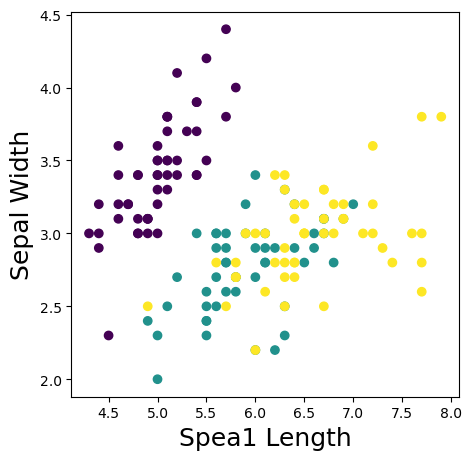

In [11]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], c=df['cluster'])
plt.xlabel('Spea1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

### Defining colors and ploting centroids for all clusters

100%|█████████████████████████████████████████████| 3/3 [00:00<00:00, 83.69it/s]


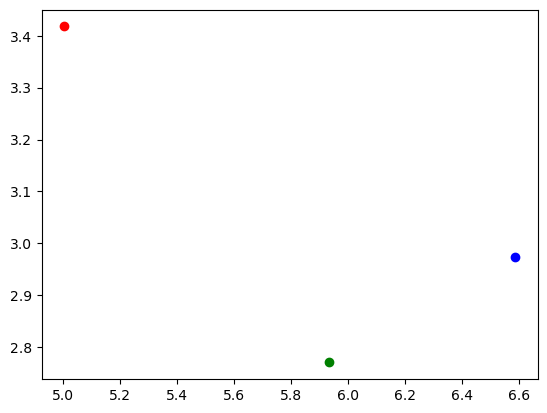

In [12]:
colmap = {0: 'r', 1: 'g', 2: 'b'}
for i in tqdm(range(3)):
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i])
plt.show()

### Showing complete graph

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 326.34it/s]


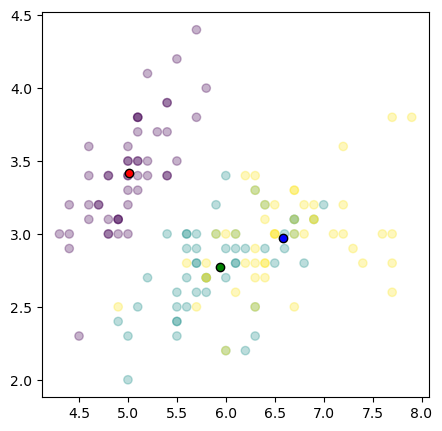

In [13]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], c=df['cluster'],alpha = 0.3)
colmap = {0: 'r', 1: 'g', 2: 'b'}
col = [0,1]
for i in tqdm(centroids.keys()):
    plt.scatter(centroids[i][0],centroids[i][1], c=colmap[i], edgecolor='k')
plt.show()

# Stage 2: Assignment Stage

### Assignment function : Calculating distance and updating dataFrame

In [14]:
def assignment(df, centroids):
    for i in tqdm(range(3)):
        # sqrt((x1 - x2)^2 + (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

In [15]:
df = assignment(df, centroids)

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 618.08it/s]


In [16]:
df

,x,y,cluster,distance_from_0,distance_from_1,distance_from_2,closest,color
0,5.1,3.5,0,0.124740,1.109863,1.578233,0,r
1,4.9,3.0,0,0.431231,1.061224,1.688200,0,r
2,4.7,3.2,0,0.375713,1.308662,1.901478,0,r
3,4.6,3.1,0,0.515713,1.376153,1.991989,0,r
4,5.0,3.6,0,0.182099,1.250998,1.706933,0,r
...,...,...,...,...,...,...,...,...
145,6.7,3.0,2,1.744809,0.797870,0.114978,2,b
146,6.3,2.5,2,1.586556,0.453206,0.554635,1,g
147,6.5,3.0,2,1.551374,0.609094,0.091761,2,b
148,6.2,3.4,2,1.194136,0.683078,0.576212,2,b


### Visualisation of clusters with colors:

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 343.70it/s]


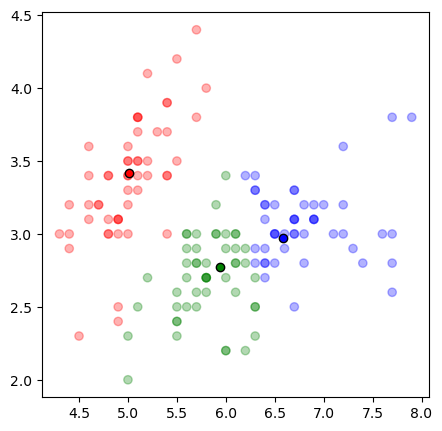

In [17]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.3)
for i in tqdm(centroids.keys()):
    plt.scatter(*centroids[i], color=colmap[i], edgecolor='k')

plt.show()

# Stage 3: Update Stage

### Update function : Updating the centroids

In [18]:
def update(k):
    for i in tqdm(range(3)):
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

In [19]:
centroids = update(centroids)
centroids

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 560.11it/s]


{0: [5.00943396226415, 3.373584905660378],
 1: [5.806122448979591, 2.693877551020408],
 2: [6.802083333333331, 3.0687499999999996]}

### Visualising the graph with updated centroids

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 313.19it/s]


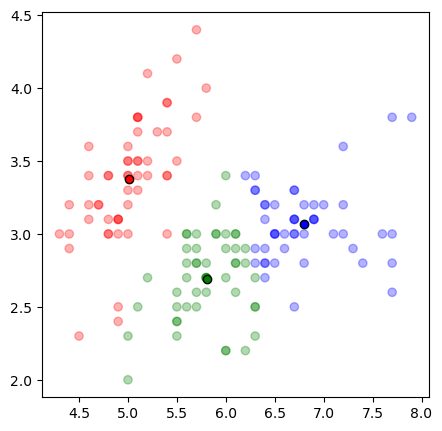

In [20]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.3)
for i in tqdm(centroids.keys()):
    plt.scatter(*centroids[i], color=colmap[i], edgecolor='k')

plt.show()

## Repeat assignment stage to to ressign the points with clusters

In [21]:
df = assignment(df, centroids)

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 599.19it/s]


### Visualising the updated graph

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 370.34it/s]


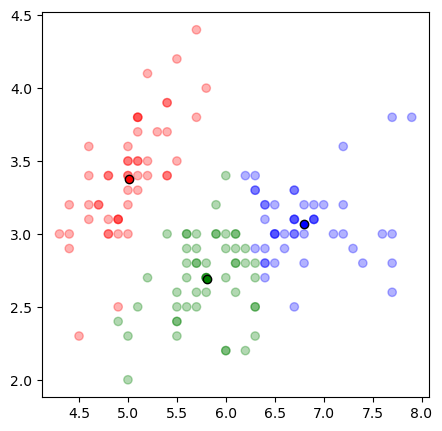

In [22]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.3)
for i in tqdm(centroids.keys()):
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i], edgecolor='k')
plt.show()

## Continuing until all assigned clusters don't change any more

In [23]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 575.82it/s]


# Final Result :

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 523.76it/s]


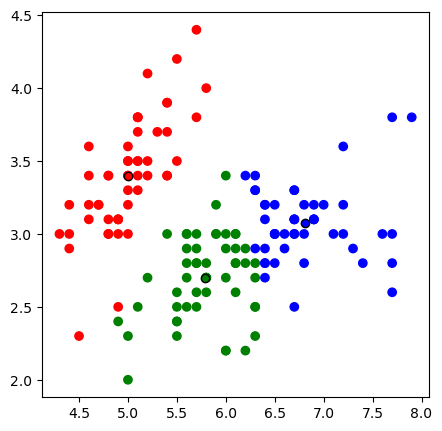

In [24]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'])
for i in tqdm(centroids.keys()):
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i], edgecolor='k')

plt.show()